In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\Dinot\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sms

In [5]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\Dinot\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
import openpyxl

In [7]:
wb = openpyxl.load_workbook('Online_Retail.xlsx')
sheet = wb.worksheets[0]


In [8]:
retail = pd.DataFrame(sheet.values)


In [10]:
retail.shape

(541910, 8)

In [11]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       541910 non-null  object
 1   1       541910 non-null  object
 2   2       540456 non-null  object
 3   3       541910 non-null  object
 4   4       541910 non-null  object
 5   5       541910 non-null  object
 6   6       406830 non-null  object
 7   7       541910 non-null  object
dtypes: object(8)
memory usage: 33.1+ MB


In [14]:
retail.head(5)

,0,1,2,3,4,5,6,7
0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [9]:
retail2 = retail.copy()

In [10]:
retail2.columns=retail2.iloc[0]
retail2 = retail2[1:]

In [14]:
retail2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541906,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.1,12680,France
541907,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541908,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [15]:
retail2.describe()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909,541909,541909.00,406829,541909
unique,25900,4070,4223,722,23260,1630.00,4372,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2011-10-31 14:41:00,1.25,17841,United Kingdom
freq,1114,2313,2369,148227,1114,50496.00,7983,495478


In [21]:
retail2.isnull().sum()

0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Sale_Price          0
Date                0
Time                0
Month               0
Year                0
dtype: int64

In [11]:
retail2.CustomerID.unique().shape

(4373,)

FINDING THE number of customers that are Registered (with Customer ID) and NOT Registered (NULL Customer ID)

In [16]:
null_cust = retail2[retail2['CustomerID'].isnull() == True]
not_null_cust = retail2[retail2['CustomerID'].isnull() == False]

In [17]:
not_null_cust['CustomerID'].unique().shape

(4372,)

In [18]:
null_cust.shape

(135080, 8)

In [61]:
not_null_cust.shape

(406829, 8)

Number of entries in customer ID (not unique): 4,06,829

Number of unique entries of customers: 4,372


Number of Non-Registered customer entries(not unique): 1,35,080

RETURNS

In [19]:
retail2[retail2['Quantity']<0].shape

(10624, 8)

In [22]:
retail2[retail2['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale_Price,Date,Time,Month,Year
142,C536379,D,Discount,-1,2010-12-01 09:41:00,27.5,14527,United Kingdom,-27.5,2010-12-01,09:41:00,Dec,2010
155,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65,2010-12-01,09:49:00,Dec,2010
236,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.8,2010-12-01,10:24:00,Dec,2010
237,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96,2010-12-01,10:24:00,Dec,2010
238,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96,2010-12-01,10:24:00,Dec,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540450,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,-9.13,2011-12-09,09:57:00,Dec,2011
541542,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,-224.69,2011-12-09,10:28:00,Dec,2011
541716,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,-54.75,2011-12-09,11:57:00,Dec,2011
541717,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,-1.25,2011-12-09,11:58:00,Dec,2011


In [20]:
retail2[(retail2['CustomerID'].isnull() == True) & (retail2['Quantity'] <0) & (retail2['UnitPrice'] > 0)].shape

(383, 8)

In [13]:
retail2[(retail2['CustomerID'].isnull() == True) & (retail2['Quantity'] <0) ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2407,536589,21777,None,-10,2010-12-01 16:50:00,0,None,United Kingdom
4348,536764,84952C,None,-38,2010-12-02 14:42:00,0,None,United Kingdom
7189,536996,22712,None,-20,2010-12-03 15:30:00,0,None,United Kingdom
7190,536997,22028,None,-20,2010-12-03 15:30:00,0,None,United Kingdom
7191,536998,85067,None,-6,2010-12-03 15:30:00,0,None,United Kingdom
...,...,...,...,...,...,...,...,...
535334,581210,23395,check,-26,2011-12-07 18:36:00,0,None,United Kingdom
535336,581212,22578,lost,-1050,2011-12-07 18:38:00,0,None,United Kingdom
535337,581213,22576,check,-30,2011-12-07 18:38:00,0,None,United Kingdom
536909,581226,23090,missing,-338,2011-12-08 09:56:00,0,None,United Kingdom


In [21]:
retail2[(retail2['CustomerID'].isnull() == False) & (retail2['Quantity'] <0) & (retail2['UnitPrice'] > 0)].shape

(8905, 8)

In [33]:
retail2[(retail2['CustomerID'].isnull() == False) & (retail2['Quantity'] <0)].shape

(8905, 8)

Out of total, no: of returns are 10,624 

the no: of returns with a valid customer ID are 8,905.

The NO: of returns with no customer ID are 1,719.

In [27]:
retail2[(retail2['CustomerID'].isnull() == True) & (retail2['Quantity'] >0) & (retail2['UnitPrice'] == 0)].shape

(1139, 8)

DESCRIPTIONS with NULL entries

In [28]:
retail2[retail2['Description'].isnull() == True].shape

(1454, 8)

DESCRIPTIONS with NULL entries, who doesn't have CUSTOMERID

In [29]:
retail2[(retail2['CustomerID'].isnull()==True) & (retail2['Description'].isnull()== True)].shape

(1454, 8)

DESCRIPTIONS with NULL entries, who doesn't have CUSTOMERID and UNIT PRICE $0

In [40]:
retail2[(retail2['CustomerID'].isnull()==True) & (retail2['Description'].isnull()== True) & (retail2['UnitPrice']== 0)].shape

(1454, 8)

DESCRIPTIONS with NULL entries, who doesn't have CUSTOMERID and UNIT PRICE $0 with -VE QUANTITY

In [41]:
retail2[(retail2['CustomerID'].isnull()==True) & (retail2['Description'].isnull()== True) & (retail2['UnitPrice']== 0) & (retail2['Quantity'] < 0)].shape

(862, 8)

DESCRIPTIONS with NULL entries, who doesn't have CUSTOMERID and UNIT PRICE $0 with +VE QUANTITY

In [42]:
retail2[(retail2['CustomerID'].isnull()==True) & (retail2['Description'].isnull()== True) & (retail2['UnitPrice']== 0) & (retail2['Quantity'] > 0)].shape

(592, 8)

DESCRIPTIONS with valid CUSTOMERID 

In [39]:
retail2[(retail2['CustomerID'].isnull()==False) & (retail2['Description'].isnull()== False)].shape

(406829, 8)

There are 1,454 customerID and description, that are NULL have unit price $0. This implies the customers with no id have no description of purchases made and there purchase amount is ZERO.
Also, there are 862 quantities that are NEGATIVE, which should possibily means GUEST CUSTOMER Returns. The remaining 592 are POSITIVE, that shows GUEST CUSTOMERS.
Since the purchase amount is ZERO, We can treat these details as JUNK VALUES, that DOESN'T directly IMPACT the SALES REVENUE.

The number of customerID and description that are NOT NULL, i.e., REGISTERED CUSTOMERS are 4,06,829.

In [12]:
retail2['Sale_Price'] = retail2['UnitPrice'] * retail2['Quantity']

In [35]:
retail2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale_Price
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.0
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541905,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.2
541906,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.1,12680,France,12.6
541907,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.6
541908,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.6


In [13]:
retail2['Date'] = pd.to_datetime(retail2['InvoiceDate']).dt.date
retail2['Time'] = pd.to_datetime(retail2['InvoiceDate']).dt.time

In [14]:
retail2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale_Price,Date,Time
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3,2010-12-01,08:26:00
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,08:26:00
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.0,2010-12-01,08:26:00
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,08:26:00
5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,08:26:00
...,...,...,...,...,...,...,...,...,...,...,...
541905,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.2,2011-12-09,12:50:00
541906,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.1,12680,France,12.6,2011-12-09,12:50:00
541907,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.6,2011-12-09,12:50:00
541908,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.6,2011-12-09,12:50:00


In [15]:
retail2['Month'] = pd.to_datetime(retail2['Date']).dt.month
retail2['Year'] = pd.to_datetime(retail2['Date']).dt.year

In [23]:
retail2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Sale_Price,Month,Year
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,08:26:00,15.3,12,2010
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,08:26:00,20.34,12,2010
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,08:26:00,22.0,12,2010
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,08:26:00,20.34,12,2010
5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,08:26:00,20.34,12,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541905,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011-12-09,12:50:00,10.2,12,2011
541906,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.1,12680,France,2011-12-09,12:50:00,12.6,12,2011
541907,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-09,12:50:00,16.6,12,2011
541908,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-09,12:50:00,16.6,12,2011


In [16]:
Month = {1: 'Jan', 2: 'Feb',3:'Mar', 4:'Apr', 5: 'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec', 
         '01': 'Jan', '02': 'Feb', '03':'Mar', '04':'Apr', '05': 'May', '06':'Jun', '07':'Jul', '08':'Aug', '09':'Sep'}
retail2 = retail2.replace({"Month": Month})

In [19]:
retail2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale_Price,Date,Time,Month,Year
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3,2010-12-01,08:26:00,Dec,2010
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,08:26:00,Dec,2010
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.0,2010-12-01,08:26:00,Dec,2010
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,08:26:00,Dec,2010
5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,08:26:00,Dec,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541905,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.2,2011-12-09,12:50:00,Dec,2011
541906,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.1,12680,France,12.6,2011-12-09,12:50:00,Dec,2011
541907,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.6,2011-12-09,12:50:00,Dec,2011
541908,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.6,2011-12-09,12:50:00,Dec,2011


In [20]:
unspecified = retail2[retail2['Country'] == 'Unspecified']
unspecified['Sale_Price'].sum()

4749.789999999996

In [124]:
may = (retail2['Month']=='May')
retail2[may]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale_Price,Date,Time,Month,Year
172000,551515,21731,RED TOADSTOOL LED NIGHT LIGHT,12,2011-05-01 10:51:00,1.65,15606,United Kingdom,19.8,2011-05-01,10:51:00,May,2011
172001,551515,20749,ASSORTED COLOUR MINI CASES,12,2011-05-01 10:51:00,6.35,15606,United Kingdom,76.2,2011-05-01,10:51:00,May,2011
172002,551515,22729,ALARM CLOCK BAKELIKE ORANGE,8,2011-05-01 10:51:00,3.75,15606,United Kingdom,30.0,2011-05-01,10:51:00,May,2011
172003,551515,22998,TRAVEL CARD WALLET KEEP CALM,24,2011-05-01 10:51:00,0.42,15606,United Kingdom,10.08,2011-05-01,10:51:00,May,2011
172004,551515,22665,RECIPE BOX BLUE SKETCHBOOK DESIGN,24,2011-05-01 10:51:00,2.55,15606,United Kingdom,61.2,2011-05-01,10:51:00,May,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209025,555150,22895,SET OF 2 TEA TOWELS APPLE AND PEARS,3,2011-05-31 15:53:00,3.25,None,United Kingdom,9.75,2011-05-31,15:53:00,May,2011
209026,555150,22983,CARD BILLBOARD FONT,3,2011-05-31 15:53:00,0.42,None,United Kingdom,1.26,2011-05-31,15:53:00,May,2011
209027,555150,23169,CLASSIC GLASS COOKIE JAR,3,2011-05-31 15:53:00,4.15,None,United Kingdom,12.45,2011-05-31,15:53:00,May,2011
209028,555150,23298,SPOTTY BUNTING,5,2011-05-31 15:53:00,4.95,None,United Kingdom,24.75,2011-05-31,15:53:00,May,2011


Sales details of countries other than UK in year 2011

In [17]:
no_uk_sales = retail2[(retail2['Year'] == 2011) & (retail2['Country'] != 'United Kingdom')]

DATA SET WITH NO UK

In [18]:
no_uk_sales

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale_Price,Date,Time,Month,Year
43420,540040,22264,FELT FARM ANIMAL WHITE BUNNY,48,2011-01-04 14:20:00,0.19,12483,Sweden,9.12,2011-01-04,14:20:00,Jan,2011
43421,540040,85169C,EAU DE NIL LOVE BIRD CANDLE,24,2011-01-04 14:20:00,0.42,12483,Sweden,10.08,2011-01-04,14:20:00,Jan,2011
43422,540040,85169A,IVORY LOVE BIRD CANDLE,24,2011-01-04 14:20:00,0.42,12483,Sweden,10.08,2011-01-04,14:20:00,Jan,2011
43423,540040,85169B,BLACK LOVE BIRD CANDLE,24,2011-01-04 14:20:00,0.42,12483,Sweden,10.08,2011-01-04,14:20:00,Jan,2011
43424,540040,22271,FELTCRAFT DOLL ROSIE,12,2011-01-04 14:20:00,2.95,12483,Sweden,35.4,2011-01-04,14:20:00,Jan,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541905,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.2,2011-12-09,12:50:00,Dec,2011
541906,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.1,12680,France,12.6,2011-12-09,12:50:00,Dec,2011
541907,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.6,2011-12-09,12:50:00,Dec,2011
541908,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.6,2011-12-09,12:50:00,Dec,2011


In [129]:
retail2[retail2['Year']==2010]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale_Price,Date,Time,Month,Year
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3,2010-12-01,08:26:00,Dec,2010
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,08:26:00,Dec,2010
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.0,2010-12-01,08:26:00,Dec,2010
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,08:26:00,Dec,2010
5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,08:26:00,Dec,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42477,539991,21618,4 WILDFLOWER BOTANICAL CANDLES,1,2010-12-23 16:49:00,1.25,None,United Kingdom,1.25,2010-12-23,16:49:00,Dec,2010
42478,539991,72741,GRAND CHOCOLATECANDLE,4,2010-12-23 16:49:00,1.45,None,United Kingdom,5.8,2010-12-23,16:49:00,Dec,2010
42479,539992,21470,FLOWER VINE RAFFIA FOOD COVER,1,2010-12-23 17:41:00,3.75,None,United Kingdom,3.75,2010-12-23,17:41:00,Dec,2010
42480,539992,22258,FELT FARM ANIMAL RABBIT,1,2010-12-23 17:41:00,1.25,None,United Kingdom,1.25,2010-12-23,17:41:00,Dec,2010


In [126]:
retail2.to_csv('Retail_Sales.csv', index=False)

THE NEGATIVE SALES DETAILS (RETURNS)

In [27]:
neg_sales = retail2[retail2['Sale_Price']<0]

In [28]:
neg_sales.shape

(9290, 9)

In [29]:
neg_sales.describe()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale_Price
count,9290,9290,9290,9290,9290,9290.00,8905,9290,9290.00
unique,3838,1948,1973,136,3768,574.00,1589,30,1297.00
top,C570867,M,Manual,-1,2011-10-12 16:17:00,1.25,14911,United Kingdom,-2.95
freq,101,244,244,4105,101,743.00,226,7858,307.00


In [30]:
neg_sales[['Description','Sale_Price']].groupby('Description').sum().sort_values(by='Sale_Price').head(5)

,Sale_Price
Description,
AMAZON FEE,-235281.59
"PAPER CRAFT , LITTLE BIRDIE",-168469.60
Manual,-146784.46
MEDIUM CERAMIC TOP STORAGE JAR,-77479.64
Adjust bad debt,-22124.12


FINDING OUTLIERS

In [69]:
retail3 = retail2[(retail2['Country'] != 'United Kingdom') & (retail2['Year'] == 2011)]

In [71]:
q1 = retail3['Sale_Price'].quantile(0.25)
q3 = retail3['Sale_Price'].quantile(0.75)
inter_quartile = q3 - q1

lower_quartile = q1 - 1.5*inter_quartile
upper_quartile = q3 + 1.5*inter_quartile



PLOTING THE ORIGINAL DATA BY PROJECTING THE SALES VALUE ON X-AXIS

<Axes: xlabel='Sale_Price', ylabel='Country'>

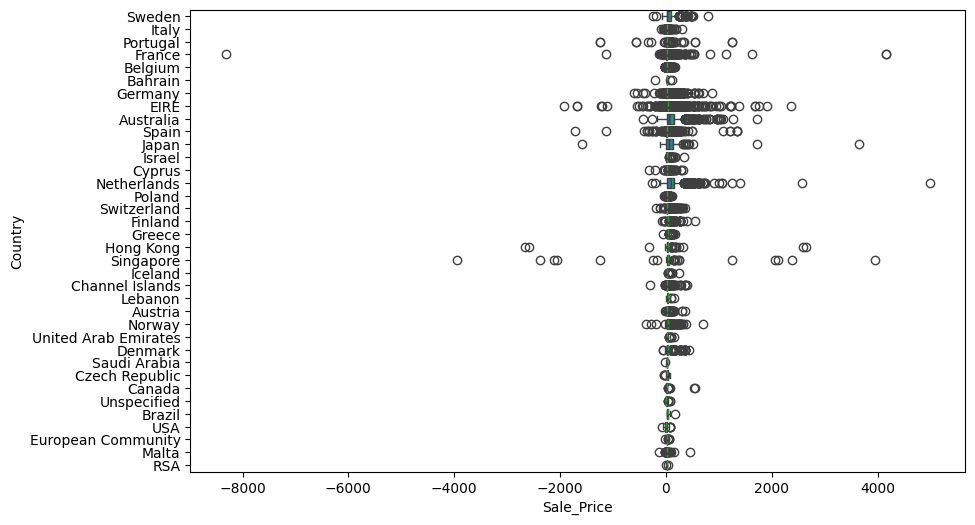

In [77]:
plt.figure(figsize=(10,6))
sms.boxplot(x=retail3['Sale_Price'], y = retail3['Country'], showmeans=True, meanline= True )

In [73]:
outliers = retail3[(retail3['Sale_Price']<lower_quartile) | (retail3['Sale_Price']>upper_quartile)]
print(outliers)

0      InvoiceNo StockCode                          Description Quantity  \
43426     540040     21731        RED TOADSTOOL LED NIGHT LIGHT       48   
43429     540040     22467                    GUMBALL COAT RACK       36   
43432     540040      POST                              POSTAGE        5   
43449    C540057      POST                              POSTAGE       -1   
43784    C540142     22960             JAM MAKING SET WITH JARS      -12   
...          ...       ...                                  ...      ...   
540344    581476     85152      HAND OVER THE CHOCOLATE   SIGN        48   
540348    581476     82600                N0 SINGING METAL SIGN       48   
540354    581476     23493      VINTAGE DOILY TRAVEL SEWING KIT       30   
540360    581476     23243  SET OF TEA COFFEE SUGAR TINS PANTRY       12   
541787    581578     22622       BOX OF VINTAGE ALPHABET BLOCKS        6   

0               InvoiceDate UnitPrice CustomerID   Country Sale_Price  \
43426   2011-0

In [74]:
outliers[outliers['Sale_Price']<0].shape

(541, 13)

In [75]:
outliers['Description'].describe()



count        6063
unique       1304
top       POSTAGE
freq          372
Name: Description, dtype: object

TOP 5 ITEMS RETURNED AND THE TOTAL SALES PRICE REFUNDED

In [36]:
outliers[['Description','Sale_Price']].groupby('Description').sum().sort_values(by='Sale_Price').head(5)

,Sale_Price
Description,
AMAZON FEE,-221519.50
Manual,-69543.75
Adjust bad debt,-11062.06
CRUK Commission,-7902.86
Bank Charges,-7340.64


TOP 5 ITEMS RETURNED AND THE TOTAL QUANTITY OF RETURN

In [37]:
outliers[['Description','Quantity']].groupby('Description').sum().sort_values(by='Quantity').head(5)

,Quantity
Description,
ROTATING SILVER ANGELS T-LIGHT HLDR,-1464
CARD HOLDER GINGHAM HEART,-174
Discount,-158
BLUE CHARLIE+LOLA PERSONAL DOORSIGN,-126
SMALLFOLKART BAUBLE CHRISTMAS DEC,-96


In [67]:
alp_stockcode = retail2['StockCode'].isin(['POST','M','D','DOT','AMAZONFEE','S'])

In [68]:
retail2[alp_stockcode]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale_Price
46,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18,12583,France,54
142,C536379,D,Discount,-1,2010-12-01 09:41:00,27.5,14527,United Kingdom,-27.5
387,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15,12791,Netherlands,15
1124,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18,12662,Germany,18
1815,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,None,United Kingdom,569.77
...,...,...,...,...,...,...,...,...,...
541541,581498,DOT,DOTCOM POSTAGE,1,2011-12-09 10:26:00,1714.17,None,United Kingdom,1714.17
541542,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,-224.69
541731,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18,12662,Germany,18
541768,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18,12526,Germany,36


In [69]:
code_post = retail2['StockCode'].isin(["POST"])
retail2[code_post]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale_Price
46,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18,12583,France,54
387,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15,12791,Netherlands,15
1124,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18,12662,Germany,18
5074,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18,12738,Germany,18
5259,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18,12686,France,18
...,...,...,...,...,...,...,...,...,...
541199,581493,POST,POSTAGE,1,2011-12-09 10:10:00,15,12423,Belgium,15
541217,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18,12518,Germany,36
541731,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18,12662,Germany,18
541768,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18,12526,Germany,36


POSTAGE CHARGE (FREE) --> THE -VE POSTAGE CHARGE 

In [103]:
retail2[(retail2.Quantity < 0) & (retail2.StockCode =='POST')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale_Price
13053,C537414,POST,POSTAGE,-1,2010-12-06 15:09:00,4.41,16861,United Kingdom,-4.41
32384,C539063,POST,POSTAGE,-1,2010-12-15 16:50:00,12.34,15107,United Kingdom,-12.34
32403,C539073,POST,POSTAGE,-1,2010-12-15 17:08:00,3.5,12971,United Kingdom,-3.5
34592,C539409,POST,POSTAGE,-1,2010-12-17 12:58:00,18,12720,Germany,-18
39906,C539712,POST,POSTAGE,-1,2010-12-21 12:40:00,5.75,15602,United Kingdom,-5.75
...,...,...,...,...,...,...,...,...,...
508000,C579192,POST,POSTAGE,-4,2011-11-28 15:43:00,18,12657,France,-72
509586,C579366,POST,POSTAGE,-1,2011-11-29 11:56:00,9.72,14205,United Kingdom,-9.72
513077,C579532,POST,POSTAGE,-1,2011-11-30 09:21:00,18,12494,France,-18
519705,C580161,POST,POSTAGE,-2,2011-12-02 10:49:00,18,12700,France,-36


In [106]:
retail2[(retail2.Quantity < 0) & (retail2.StockCode == 'POST')]['Sale_Price'].sum()

-11871.24

CRUK COMMISSION ---> CHARITY

In [110]:
retail2[retail2['StockCode']== 'CRUK']['Sale_Price'].sum()

-7933.43

DAMAGES/SAMPLES 

In [113]:
retail2[(retail2.StockCode == 84352) & (retail2.Quantity < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale_Price
29284,C538734,84352,SILVER CHRISTMAS TREE BAUBLE STAND,-2,2010-12-14 11:24:00,16.95,16810,United Kingdom,-33.9
32371,C539054,84352,SILVER CHRISTMAS TREE BAUBLE STAND,-1,2010-12-15 16:34:00,16.95,17044,United Kingdom,-16.95
42559,C540006,84352,SILVER CHRISTMAS TREE BAUBLE STAND,-1,2011-01-04 10:48:00,16.95,14606,United Kingdom,-16.95
285727,561920,84352,Damages/samples,-52,2011-08-01 12:10:00,0,None,United Kingdom,0


AMAZON FEE 

In [71]:
amazon = retail2['StockCode'].isin(['AMAZONFEE'])
retail2[amazon]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale_Price
14515,C537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1,None,United Kingdom,-1
15017,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,None,United Kingdom,-13541.33
15018,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,None,United Kingdom,13541.33
16233,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,None,United Kingdom,-13474.79
16314,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,None,United Kingdom,-5519.25
16357,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,None,United Kingdom,-13541.33
16358,C537652,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:51:00,6706.71,None,United Kingdom,-6706.71
43703,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,None,United Kingdom,-16888.02
43704,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,None,United Kingdom,-16453.71
96845,C544587,AMAZONFEE,AMAZON FEE,-1,2011-02-21 15:07:00,5575.28,None,United Kingdom,-5575.28


In [107]:
total_revenue = retail2['Sale_Price'].sum()
total_revenue

9747747.93400317

In [73]:
retail2[amazon]['Sale_Price'].sum()

-221520.50000000003

BANK CHARGES

In [76]:
bank_charges = retail2['StockCode'].isin(['BANK CHARGES'])

In [77]:
retail2[bank_charges]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale_Price
4407,536779,BANK CHARGES,Bank Charges,1,2010-12-02 15:08:00,15,15823,United Kingdom,15
14436,C537572,BANK CHARGES,Bank Charges,-1,2010-12-07 12:00:00,95.38,None,United Kingdom,-95.38
28993,C538680,BANK CHARGES,Bank Charges,-1,2010-12-13 17:10:00,966.92,None,United Kingdom,-966.92
62509,541505,BANK CHARGES,Bank Charges,1,2011-01-18 15:58:00,15,15939,United Kingdom,15
64574,C541653,BANK CHARGES,Bank Charges,-1,2011-01-20 11:50:00,1050.15,None,United Kingdom,-1050.15
90559,C544049,BANK CHARGES,Bank Charges,-1,2011-02-15 12:39:00,566.37,None,United Kingdom,-566.37
96676,C544575,BANK CHARGES,Bank Charges,-1,2011-02-21 13:58:00,134.76,None,United Kingdom,-134.76
96677,C544576,BANK CHARGES,Bank Charges,-1,2011-02-21 14:01:00,149.16,None,United Kingdom,-149.16
96716,C544584,BANK CHARGES,Bank Charges,-1,2011-02-21 14:52:00,109.84,None,United Kingdom,-109.84
112234,C545887,BANK CHARGES,Bank Charges,-1,2011-03-07 15:54:00,326.68,None,United Kingdom,-326.68


In [78]:
retail2[bank_charges]['Sale_Price'].sum()

-7175.638999999999

In [117]:
retail2[(retail2.StockCode == 'M') & (retail2.Sale_Price <0) ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale_Price
14717,C537610,M,Manual,-1,2010-12-07 13:23:00,631.31,None,United Kingdom,-631.31
14729,C537613,M,Manual,-1,2010-12-07 13:28:00,313.78,None,United Kingdom,-313.78
21759,C538124,M,Manual,-4,2010-12-09 15:43:00,0.5,15329,United Kingdom,-2.0
23242,C538189,M,Manual,-1,2010-12-10 10:35:00,133.08,None,United Kingdom,-133.08
28994,C538681,M,Manual,-1,2010-12-13 17:12:00,316.3,None,United Kingdom,-316.3
...,...,...,...,...,...,...,...,...,...
520135,C580263,M,Manual,-16,2011-12-02 12:43:00,0.29,12536,France,-4.64
523376,C580510,M,Manual,-1,2011-12-04 13:48:00,1.25,14456,United Kingdom,-1.25
533083,C581009,M,Manual,-1,2011-12-07 09:15:00,125,16971,United Kingdom,-125
534309,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490,United Kingdom,-9.95


PARETO CHART

In [19]:
from matplotlib.ticker import PercentFormatter

In [20]:
retail3 = retail2[retail2['Year']==2011]

In [56]:
df = retail2.groupby('Country')['Sale_Price'].sum().reset_index()

In [57]:
df = df.sort_values(by='Sale_Price', ascending = False)

In [58]:
df['cummulative_sum'] = df['Sale_Price'].cumsum()/df['Sale_Price'].sum()

In [59]:
df = df[df['Country'] != 'United Kingdom']

C:\Users\Dinot\AppData\Local\Temp\ipykernel_27316\1194030737.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.Country, rotation =90)


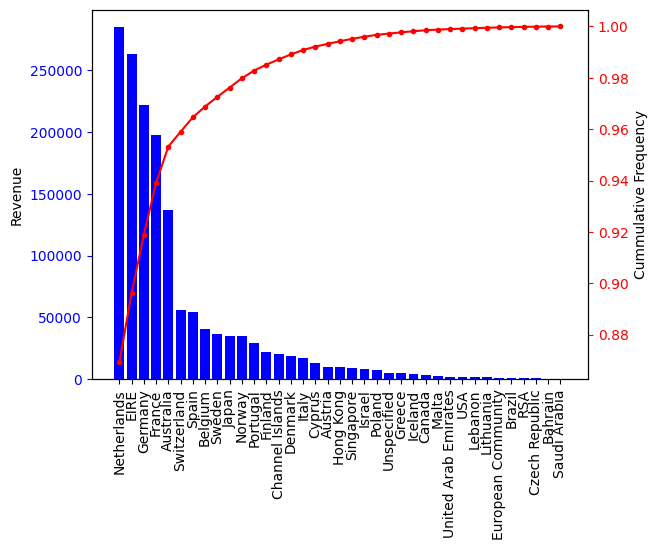

In [142]:
fig, ax = plt.subplots()
ax.bar(df.Country, df['Sale_Price'], color='blue')
ax.set_ylabel('Revenue')


ax2 = ax.twinx()
ax2.plot(df.Country, df['cummulative_sum'], color='red', marker = 'o', ms=3)
ax2.set_ylabel('Cummulative Frequency')

#ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
ax.set_xticklabels(df.Country, rotation =90)


plt.show()